## Import Library

In [1]:
import cv2
import imutils as im
import numpy as np
import matplotlib.pyplot as plt

## Menampilkan Gambar Asli

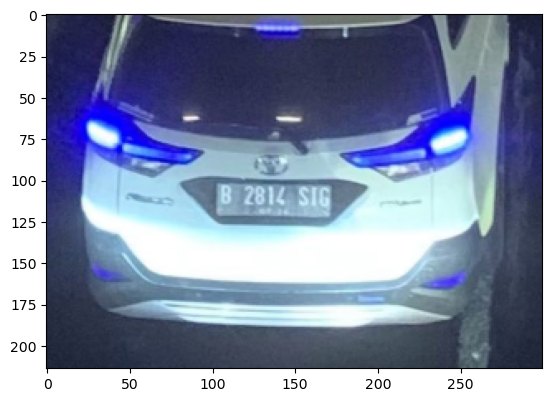

In [2]:
img = cv2.imread('mobil.jpeg')
img = im.resize(img, width=300)
plt.imshow(img,cmap='gray')

## Grayscale dan Edges

Text(0.5, 1.0, 'After Edges')

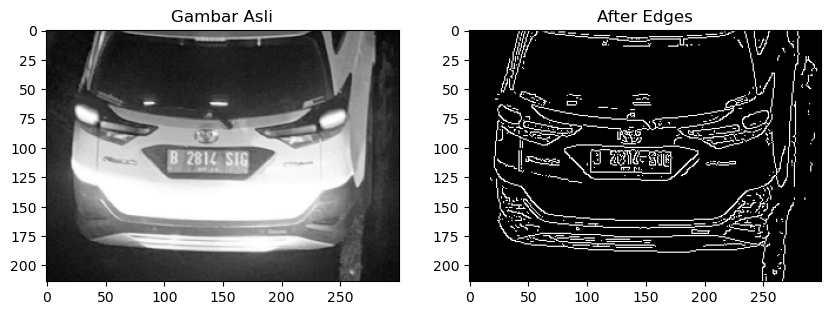

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.bilateralFilter(gray, 11, 17, 17)
edges = cv2.Canny(blur, 30, 30)

# Menggunakan Matplotlib
fig, axs = plt.subplots(1,2, figsize = (10,10))
ax = axs.ravel()

# Tampilan Asli
ax[0].imshow(gray,cmap = 'gray')
ax[0].set_title('Gambar Asli')

#Tampilan Edges
ax[1].imshow(edges,cmap = 'gray')
ax[1].set_title('After Edges')


## Contour dan Zoom Image

In [4]:
fc = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cont = im.grab_contours(fc)
cont = sorted(cont, key = cv2.contourArea, reverse = True)[:30]

platnomor = 0

count = 0
for c in cont:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        if len(approx) == 4:
            platnomor = approx
            break

In [5]:
mask = np.zeros(gray.shape, np.uint8)
new = cv2.drawContours(mask, [platnomor], 0,255, -1)
new = cv2.bitwise_and(img, img, mask = mask)

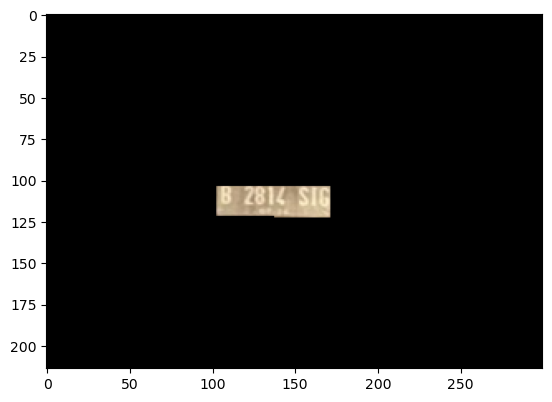

In [6]:
plt.imshow(cv2.cvtColor(new, cv2.COLOR_BGR2RGB))

## Cropped Image

In [7]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_platnomor = gray[x1:x2+1, y1:y2+1]

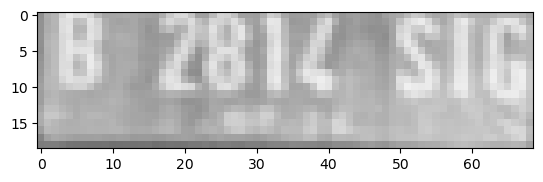

In [8]:
plt.imshow(cv2.cvtColor(cropped_platnomor, cv2.COLOR_BGR2RGB))

## Binary dan Edges

In [9]:
(thresh, binary) = cv2.threshold(cropped_platnomor, 128, 256, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

edge = cv2.Canny(cropped_platnomor, 30, 30)

## Output yang ditampilkan

Text(0.5, 1.0, 'Edges Image')

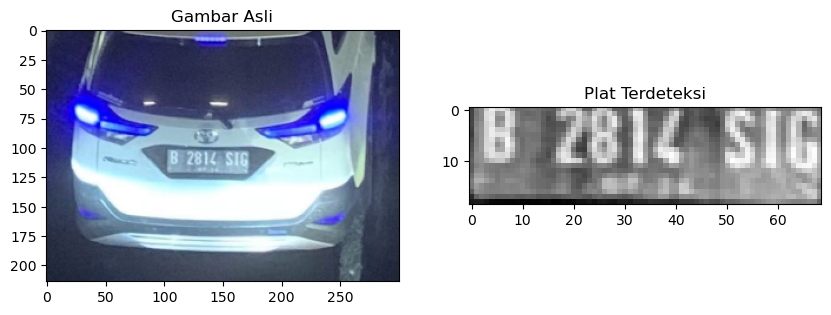

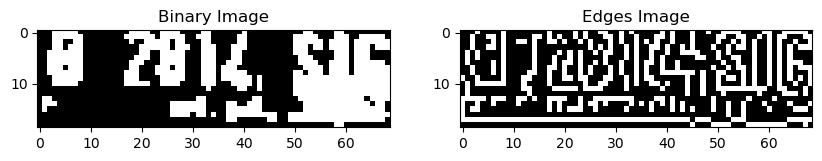

In [10]:
# Menggunakan Matplotlib
fig, axs = plt.subplots(1,2, figsize = (10,10))
ax = axs.ravel()

# Tampilan Asli
ax[0].imshow(img,cmap = 'gray')
ax[0].set_title('Gambar Asli')

#Tampilan Plat terdeteksi
ax[1].imshow(cropped_platnomor,cmap = 'gray')
ax[1].set_title('Plat Terdeteksi')

# Menggunakan Matplotlib
fig, axs = plt.subplots(1,2, figsize = (10,10))
ax = axs.ravel()

#Tampilan Binary
ax[0].imshow(binary,cmap = 'gray')
ax[0].set_title('Binary Image')

#Tampilan Edges
ax[1].imshow(edge,cmap = 'gray')
ax[1].set_title('Edges Image')

## Menyimpan Plat Nomor Yang Terdeteksi Dari Gambar Asli

In [11]:
cv2.drawContours(img, [platnomor], -1, (0,255,0), 3)
cv2.imwrite('deteksi.jpg', img)

cv2.imshow("Plat Nomer Yang Terdeteksi", img)
cv2.waitKey(0)
cv2.destroyAllWindows()